# Toy Datasets

Spravime si generatory dat, nad ktorymi budeme vypracovavat demonstracie.

## Circle dataset

Vygenerujeme vzorky s dvoma hodnotami (nx=2), ktore budeme klasifikovat do 2 tried, podla toho, ci ich vzdialenost od stredu je vacsia ako hranicny polomer r.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def dataset_Circles(m=10, radius=0.7, noise=0.0, verbose=False):

    # Hodnoty X budu v intervale <-1; 1>
    X = (np.random.rand(2, m) * 2.0) - 1.0
    if (verbose): print('X: \n', X, '\n')

    # Element-wise nasobenie nahodnym sumom
    N = (np.random.rand(2, m)-0.5) * noise
    if (verbose): print('N: \n', N, '\n')
    Xnoise = X + N
    if (verbose): print('Xnoise: \n', Xnoise, '\n')

    # Spocitame polomer
    # Element-wise druha mocnina
    XSquare = Xnoise ** 2
    if (verbose): print('XSquare: \n', XSquare, '\n')

    # Spocitame podla prvej osi. Ziskame (1, m) array.
    RSquare = np.sum(XSquare, axis=0, keepdims=True)
    if (verbose): print('RSquare: \n', RSquare, '\n')
    R = np.sqrt(RSquare)
    if (verbose): print('R: \n', R, '\n')

    # Y bude 1, ak je polomer vacsi ako argument radius
    Y = (R > radius).astype(float)
    if (verbose): print('Y: \n', Y, '\n')

    # Vratime X, Y
    return X, Y


In [3]:
# Spravime ukazkovy dataset
X, Y = dataset_Circles(m=5, radius=0.5, noise=0.0, verbose=True)

# Skusime z X a Y ziskat vlastnosti datasetu
nx, m = X.shape
ny, _ = Y.shape

print('Vlastnosti datasetu: ')
print('  nx = ', nx)
print('  ny = ', ny)
print('  m  = ', m)
print('')


X: 
 [[-0.92447857 -0.0655987   0.95939567 -0.78552663 -0.42450999]
 [-0.08817778  0.6680097   0.71284951 -0.75117964  0.45127224]] 

N: 
 [[-0.  0.  0.  0. -0.]
 [-0. -0.  0. -0. -0.]] 

Xnoise: 
 [[-0.92447857 -0.0655987   0.95939567 -0.78552663 -0.42450999]
 [-0.08817778  0.6680097   0.71284951 -0.75117964  0.45127224]] 

XSquare: 
 [[0.85466063 0.00430319 0.92044005 0.61705209 0.18020873]
 [0.00777532 0.44623696 0.50815443 0.56427084 0.20364664]] 

RSquare: 
 [[0.86243595 0.45054015 1.42859448 1.18132294 0.38385537]] 

R: 
 [[0.9286743  0.67122287 1.19523825 1.08688681 0.61956062]] 

Y: 
 [[1. 1. 1. 1. 1.]] 

Vlastnosti datasetu: 
  nx =  2
  ny =  1
  m  =  5



## Vizualizacia datasetu

Je dobre si vediet vizualizovat data, s ktorymi pracujeme. Pouzijeme PyPlot kniznicu a spravime SCATTER graf.

In [4]:
def draw_Scatter(X, Y):

    # 9 x 9 palcovy obrazok s linearnou mierkou
    plt.figure(figsize=(9, 9))
    plt.xscale('linear')
    plt.yscale('linear')

    # Nakreslime scatter graf
    plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.RdBu)
    plt.show()
    plt.close()


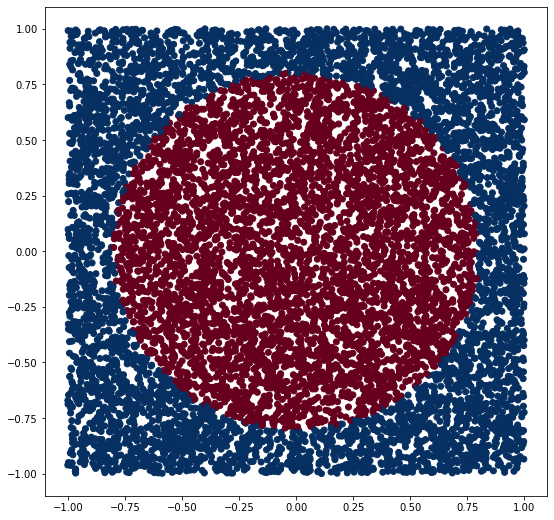

In [5]:
# Spravime ukazkovy dataset a vizualizujeme ho
X, Y = dataset_Circles(m=10000, radius=0.8, noise=0.0, verbose=False)

draw_Scatter(X, Y)

## Kvetinkovy vzor (Flower pattern)

Druhy hrackarsky dataset bude kreslit vzor pripominajuci lupene kvetu.


In [6]:
def dataset_Flower(m=10, noise=0.0):
    # Inicializujeme matice
    X = np.zeros((m, 2), dtype='float')
    Y = np.zeros((m, 1), dtype='float')

    a = 1.0
    pi = 3.141592654
    M = int(m/2)

    for j in range(2):
        ix = range(M*j, M*(j+1))
        t = np.linspace(j*pi, (j+1)*pi, M) + np.random.randn(M)*noise
        r = a*np.sin(4*t) + np.random.randn(M)*noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T
    return X, Y

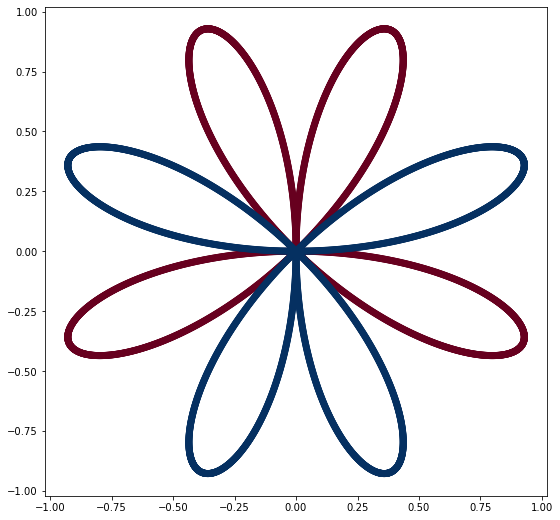

In [7]:
# Ukazka Flower datasetu
X, Y = dataset_Flower(m=5000, noise=0.0)

draw_Scatter(X, Y)

## Batch vs. MiniBatch

Spravme si este jednu pomocnu funkciu, ktorou budeme vediet ovladat velkost davok, po ktorych sa data budu spracovavat. Touto funkciou budeme vediet dosiahnut vsetky 3 moznosti:
- spracovat cely dataset v jednom kroku
- spracovavat dataset po mensich davkach
- spracovavat dataset jednotlivo po vzorkach

In [8]:
def MakeBatches(dataset, batchSize):
    # Set obsahuje 2 mnoziny - X, Y
    X, Y = dataset

    # Zistime celkovy pocet vzoriek
    nx, m = X.shape
    ny, _ = Y.shape

    # Vysledny zoznam
    result = []

    # Ak je batchSize = 0, berieme celu mnozinu
    if (batchSize <= 0):
        batchSize = m

    # Celkovy pocet davok sa zaokruhluje nahor
    steps = int(np.ceil(m / batchSize))
    for i in range(steps):

        # Spocitame hranice rezu
        mStart = i * batchSize
        mEnd = min(mStart + batchSize, m)

        # Vyberame data pre aktualny rez - chceme dodrzat rank
        minibatchX = X[:,mStart:mEnd]
        minibatchY = Y[:,mStart:mEnd]

        assert(len(minibatchX.shape) == 2)
        assert(len(minibatchY.shape) == 2)

        # Pridame novu dvojicu do vysledneho zoznamu
        result.append((minibatchX, minibatchY))

    return result


In [9]:
# Vyskusajme, ci MakeBatches funguje spravne
trainSet = dataset_Circles(m=8)

# Spravime tri verzie z datasetu
setComplete = MakeBatches(trainSet, 0)
setThree = MakeBatches(trainSet, 3)
setOne = MakeBatches(trainSet, 1)

print('Complete set: \n', setComplete, '\n')
print('Batches with size 3: \n', setThree, '\n')
print('Batches with size 1: \n', setOne, '\n')



Complete set: 
 [(array([[-0.68400081,  0.495544  ,  0.79961154,  0.39700079,  0.76116053,
         0.18830331, -0.92342254, -0.1185372 ],
       [ 0.27796683, -0.53485786, -0.63709734,  0.60984853, -0.10022976,
        -0.44528112, -0.04835691,  0.2940747 ]]), array([[1., 1., 1., 1., 1., 0., 1., 0.]]))] 

Batches with size 3: 
 [(array([[-0.68400081,  0.495544  ,  0.79961154],
       [ 0.27796683, -0.53485786, -0.63709734]]), array([[1., 1., 1.]])), (array([[ 0.39700079,  0.76116053,  0.18830331],
       [ 0.60984853, -0.10022976, -0.44528112]]), array([[1., 1., 0.]])), (array([[-0.92342254, -0.1185372 ],
       [-0.04835691,  0.2940747 ]]), array([[1., 0.]]))] 

Batches with size 1: 
 [(array([[-0.68400081],
       [ 0.27796683]]), array([[1.]])), (array([[ 0.495544  ],
       [-0.53485786]]), array([[1.]])), (array([[ 0.79961154],
       [-0.63709734]]), array([[1.]])), (array([[0.39700079],
       [0.60984853]]), array([[1.]])), (array([[ 0.76116053],
       [-0.10022976]]), array(

## Vizualizacia hranice rozhodovania (decision boundary)

Filled Contour graf, ktory vizualizuje vysledok funkcie (modelu, neuronovej siete) pre vsetky kombinacie, ktore mozu nadobudat vstupne data X1, X2.

In [10]:
def draw_DecisionBoundary(X, Y, model):

    # Najdeme hranice, pre ktore budeme skumat predikciu
    pad = 0.5
    x1_Min, x1_Max = X[0,:].min()-pad, X[0,:].max()+pad
    x2_Min, x2_Max = X[1,:].min()-pad, X[1,:].max()+pad

    # Spravime mriezku dvojic - vzorkujeme cely interval <MIN; MAX> s granularitou h
    h = 0.01  
    x1_Grid, x2_Grid = np.meshgrid(
        np.arange(x1_Min, x1_Max, h),
        np.arange(x2_Min, x2_Max, h)
    )

    # Usporiadame si mriezku hodnot do rovnakeho tvaru ako ma X
    XX = np.c_[x1_Grid.ravel(), x2_Grid.ravel()].T

    # Vypocitame predikciu pomocou modelu na vsetky hodnoty mriezky
    YHat = model(XX)

    # A usporiadame si vysledok tak, aby sme ho mohli podhodit PyPlotu
    YHat = YHat.reshape(x1_Grid.shape)

    # Najskor nakreslime contour graf - vysledky skumania pre mriezku
    plt.figure(figsize=(9, 9))
    plt.xscale('linear')
    plt.yscale('linear')
    plt.contourf(x1_Grid, x2_Grid, YHat, cmap=plt.cm.RdYlBu)

    # Potom este pridame scatter graf pre X, Y
    plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.RdBu)
    
    plt.show()
    plt.close()


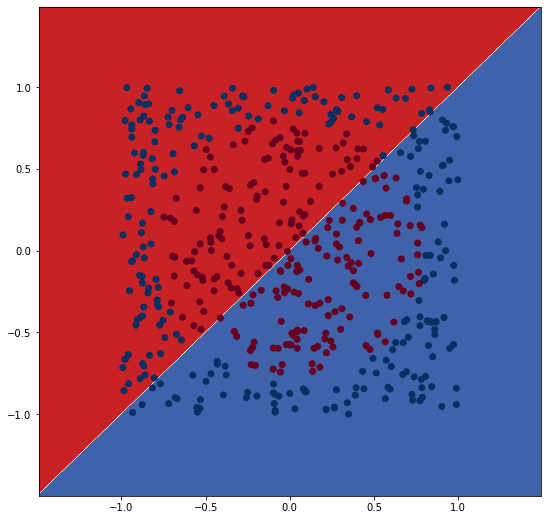

In [11]:

def testModel(X):
    # Vstup je tvaru (2, m)
    # Vystup bude tvaru (1, m)
    x1 = X[0, None]
    x2 = X[1, None]
    # Zatial iba jednoducha ukazkova funkcia
    yhat = (x1 > x2).astype(float)
    return yhat

# Spravime ukazkovy dataset a vizualizujeme ho
X, Y = dataset_Circles(m=500, radius=0.8, noise=0.0, verbose=False)

# Kreslime decision boundary
draw_DecisionBoundary(X, Y, testModel)
